<a href="https://colab.research.google.com/github/Sanjeetshkhr/Stock-Market-Analysis-Using-LTSM/blob/main/StockMarketAnalysisAndPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rough Goals:**
Analyse Stock market data of some specific companines and get stock informations using pandas,
Visualize and Analyse the stocks based on its history

**Detailed Objective**


---
Browse through Stocks on Yahoo.com and pick some websites.

Try To answer the questions
1.   What was the change in price of the stock over time?
2.   What was the daily return of the stock on average?
1.   What was the moving average of the various stocks?
2.   What was the correlation between different stocks'?
1.   How much value do we put at risk by investing in a particular stock?
2.   How can we attempt to predict future stock behavior?








Outline of Work


*   Change in price of the stock over time.


> Import Libraries.

> Read Stock Data from Yahoo.

> Choose Stocks work with.

> Clean Data and Create DataFrame.

> Visualize Data on per Stock basis.









In [ ]:
#Used to get data from yahoo
!pip install pandas-datareader
!pip install yfinance
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from yahoofinancials import YahooFinancials

# For time stamps
from datetime import datetime

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
endDate= datetime.now()
startDate = datetime(endDate.year - 1, endDate.month , endDate.day)


In [ ]:
#Getting dataset for each stock
for i in tech_list:
  name = i
  globals()[i] = yf.download(name, start=startDate, end=endDate, progress=False)


In [ ]:
#Adding Company name as attribute of df
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name


In [ ]:
#Creating single df
df = pd.concat(company_list, axis=0)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-06-15,134.289993,137.339996,132.160004,135.429993,134.626099,91533000,APPLE
2022-06-16,132.080002,132.389999,129.039993,130.059998,129.287979,108123900,APPLE
2022-06-17,130.070007,133.080002,129.809998,131.559998,130.779083,134520300,APPLE
2022-06-21,133.419998,137.059998,133.320007,135.869995,135.063507,81000500,APPLE
2022-06-22,134.789993,137.759995,133.910004,135.350006,134.546600,73409200,APPLE
2022-06-23,136.820007,138.589996,135.630005,138.270004,137.449249,72433800,APPLE
2022-06-24,139.899994,141.910004,139.770004,141.660004,140.819138,89116800,APPLE
2022-06-27,142.699997,143.490005,140.970001,141.660004,140.819138,70207900,APPLE
2022-06-28,142.130005,143.419998,137.320007,137.440002,136.624191,67083400,APPLE


In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,152.872192,154.771673,151.279323,153.161155,152.697246,7.340529e+07
std,13.471939,13.245276,13.732139,13.525713,13.618506,2.248455e+07
min,126.010002,127.769997,124.169998,125.019997,124.656975,3.519590e+07
25%,142.930000,145.560005,141.090004,143.300003,142.765518,5.706270e+07
50%,151.190002,153.399994,149.639999,151.600006,150.850708,6.967280e+07
75%,162.750000,165.334999,161.955002,164.215004,163.831406,8.274495e+07
max,183.369995,184.949997,182.440002,183.949997,183.949997,1.647624e+08


In [ ]:
#Genaral Information
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-06-15 to 2023-06-14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


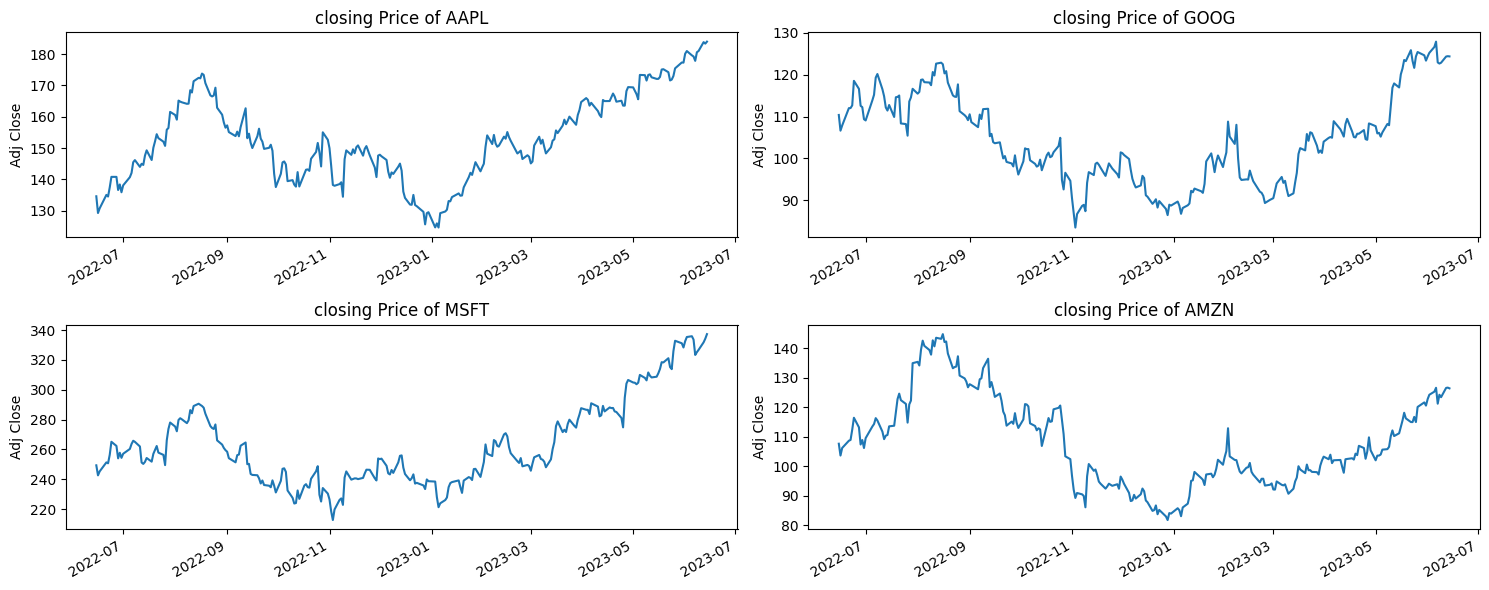

In [ ]:
# Historical View

plt.figure(figsize=(15,6))
# plt.subplots_adjust(top=1.5, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2,2,i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f"closing Price of {tech_list[i-1]}")

plt.tight_layout()

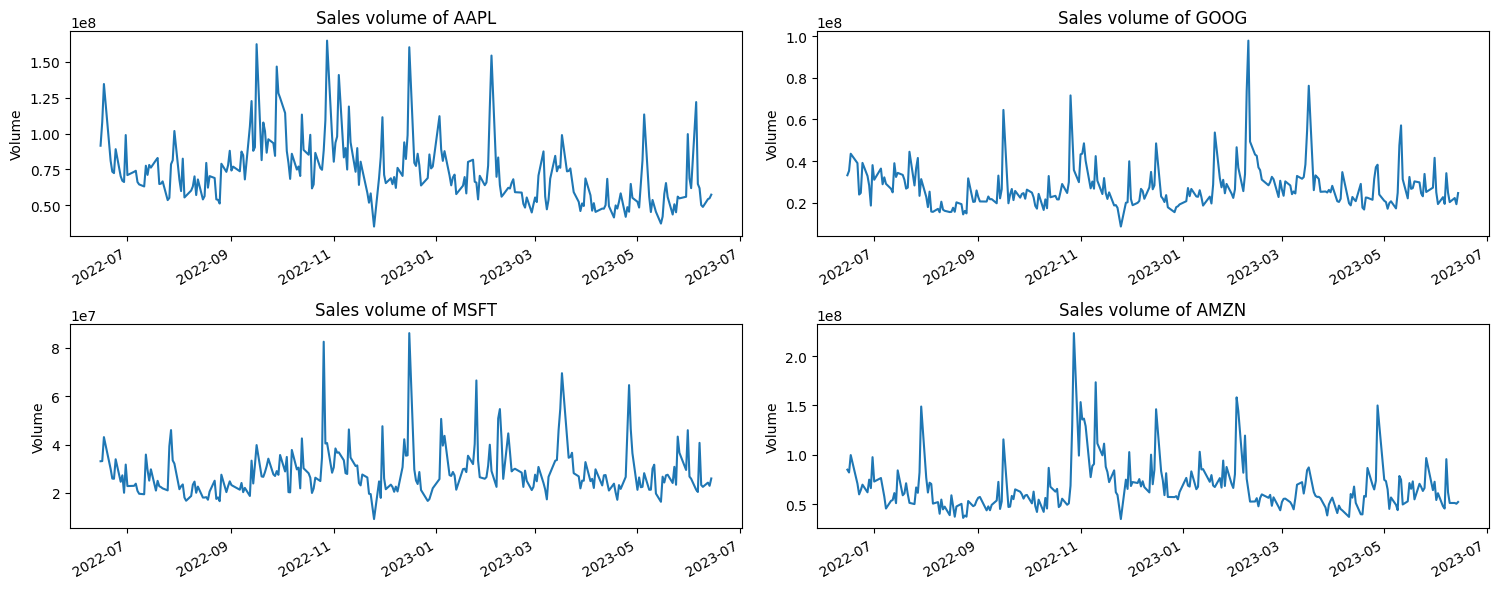

In [ ]:
# Ploting volume of stocks traded each day
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1.5, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2,2,i)
  company['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"Sales volume of {tech_list[i-1]}")

plt.tight_layout()



```
What was the moving average of the various stocks?
```
Todo



Use Adj Close and number of days to calculate Moving average.

Visualize the Results in one single visualization.


In [ ]:
#Adding moving Average columns into dataset
Moving_ave = [10, 20, 50]

for period in Moving_ave:
  for company in company_list:
    column_name = f"MOVING AVERAGE FOR {period} DAYS"
    company[column_name] = company['Adj Close'].rolling(period).mean()

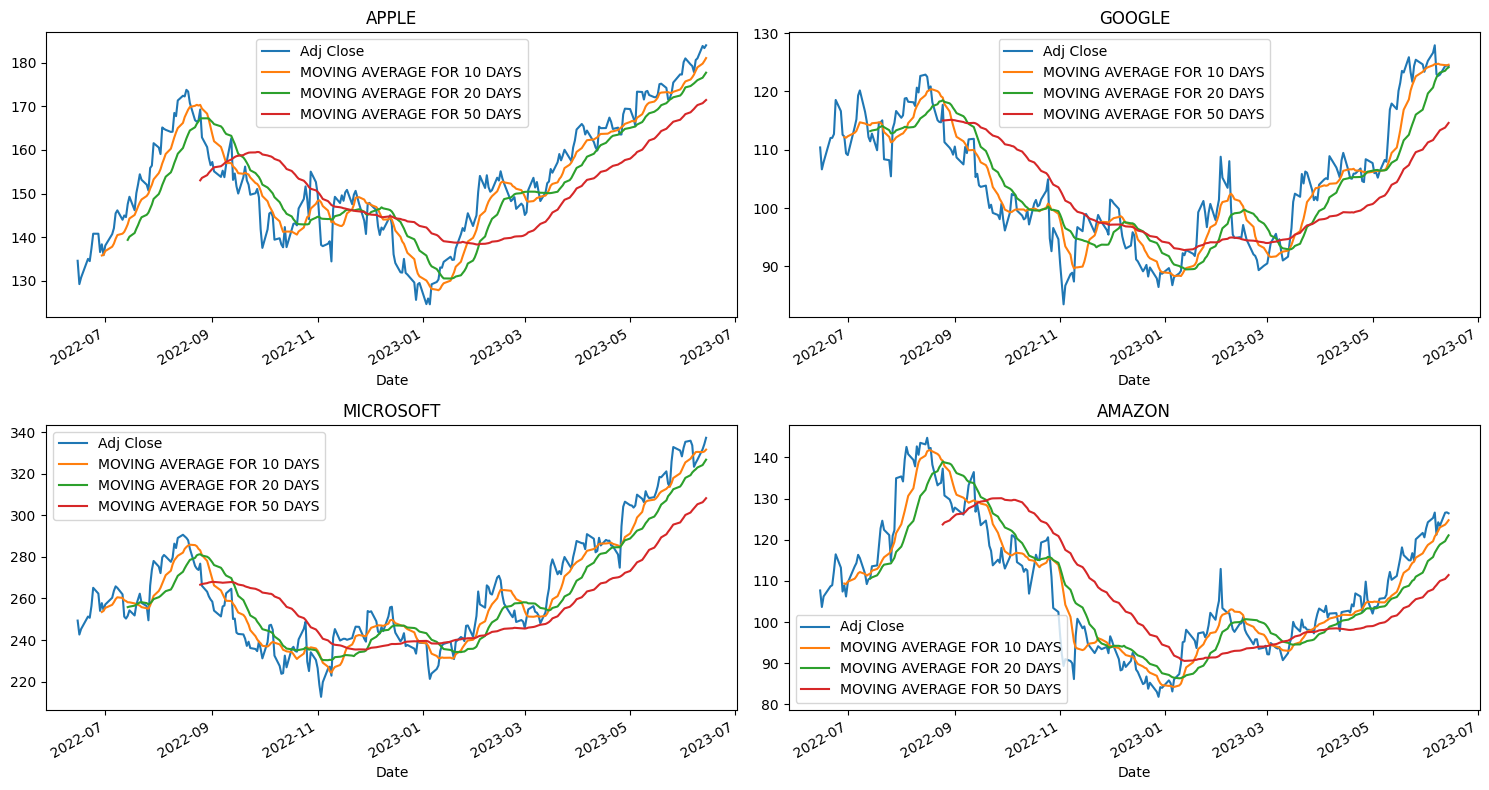

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)


AAPL[['Adj Close', 'MOVING AVERAGE FOR 10 DAYS', 'MOVING AVERAGE FOR 20 DAYS', 'MOVING AVERAGE FOR 50 DAYS']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MOVING AVERAGE FOR 10 DAYS', 'MOVING AVERAGE FOR 20 DAYS', 'MOVING AVERAGE FOR 50 DAYS']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MOVING AVERAGE FOR 10 DAYS', 'MOVING AVERAGE FOR 20 DAYS', 'MOVING AVERAGE FOR 50 DAYS']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MOVING AVERAGE FOR 10 DAYS', 'MOVING AVERAGE FOR 20 DAYS', 'MOVING AVERAGE FOR 50 DAYS']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()



```
What was the daily return of the stock on average?
```
TODO

Find percent change for each day

Visualise daily return using Seaborn

Average daily returns using kde plot and histogram


In [ ]:
for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()

In [ ]:
GOOG.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name,MOVING AVERAGE FOR 10 DAYS,MOVING AVERAGE FOR 20 DAYS,MOVING AVERAGE FOR 50 DAYS,Daily Return
Date,,,,,,,,,,,
2023-06-08,122.584999,123.730003,122.010002,122.669998,122.669998,24815000,GOOGLE,124.754001,122.923000,112.9199,-0.002196
2023-06-09,122.559998,124.285004,122.419998,122.870003,122.870003,20304500,GOOGLE,124.606001,123.221500,113.3393,0.001630
2023-06-12,123.394997,124.750000,122.349998,124.349998,124.349998,22255700,GOOGLE,124.498001,123.543000,113.7999,0.012045
2023-06-13,125.650002,125.860001,123.845001,124.430000,124.430000,19287700,GOOGLE,124.477001,123.916500,114.2085,0.000643
2023-06-14,123.800003,124.790001,122.160004,124.379997,124.379997,24647700,GOOGLE,124.578001,124.131001,114.5979,-0.000402


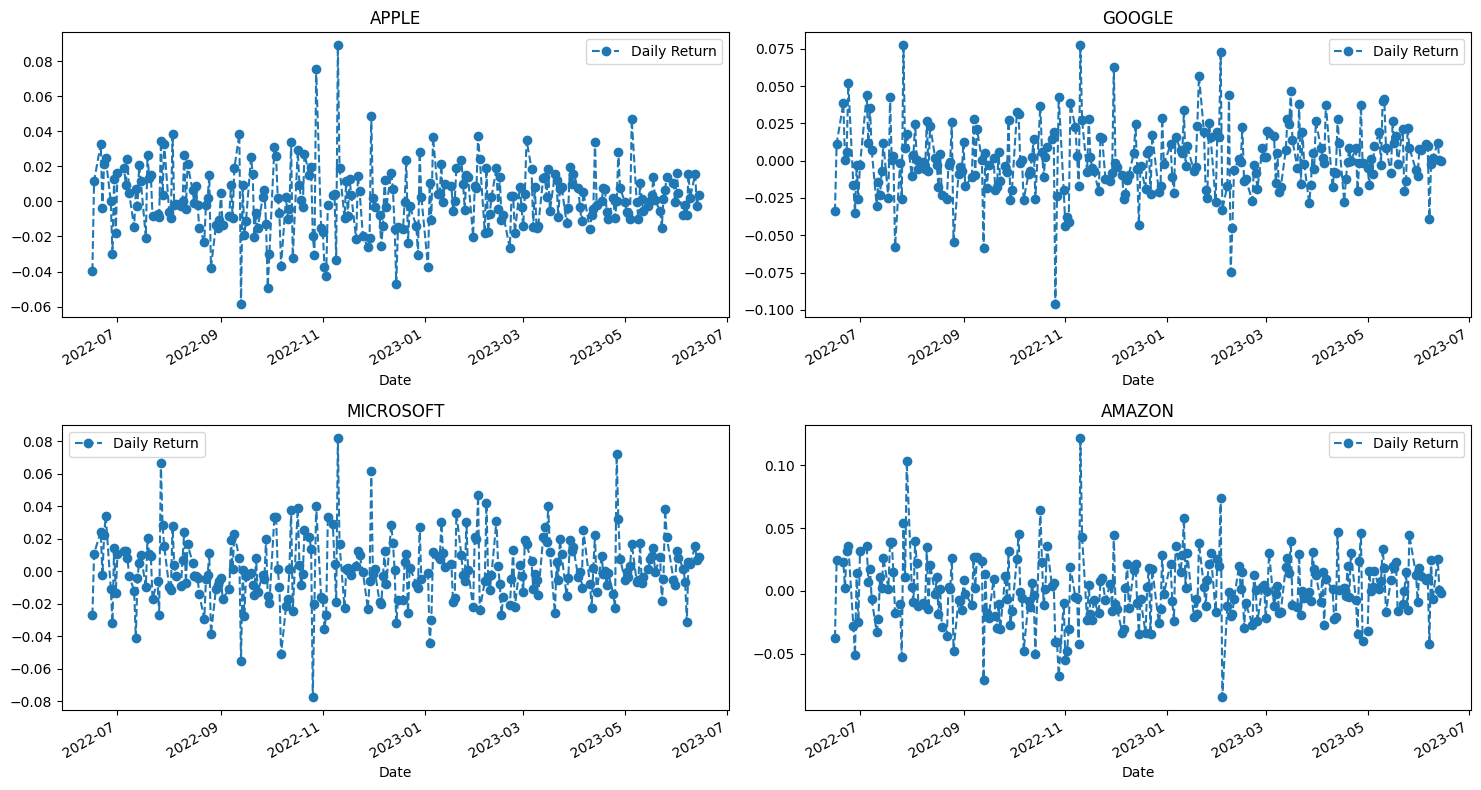

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

```
What is the average daily return?
```

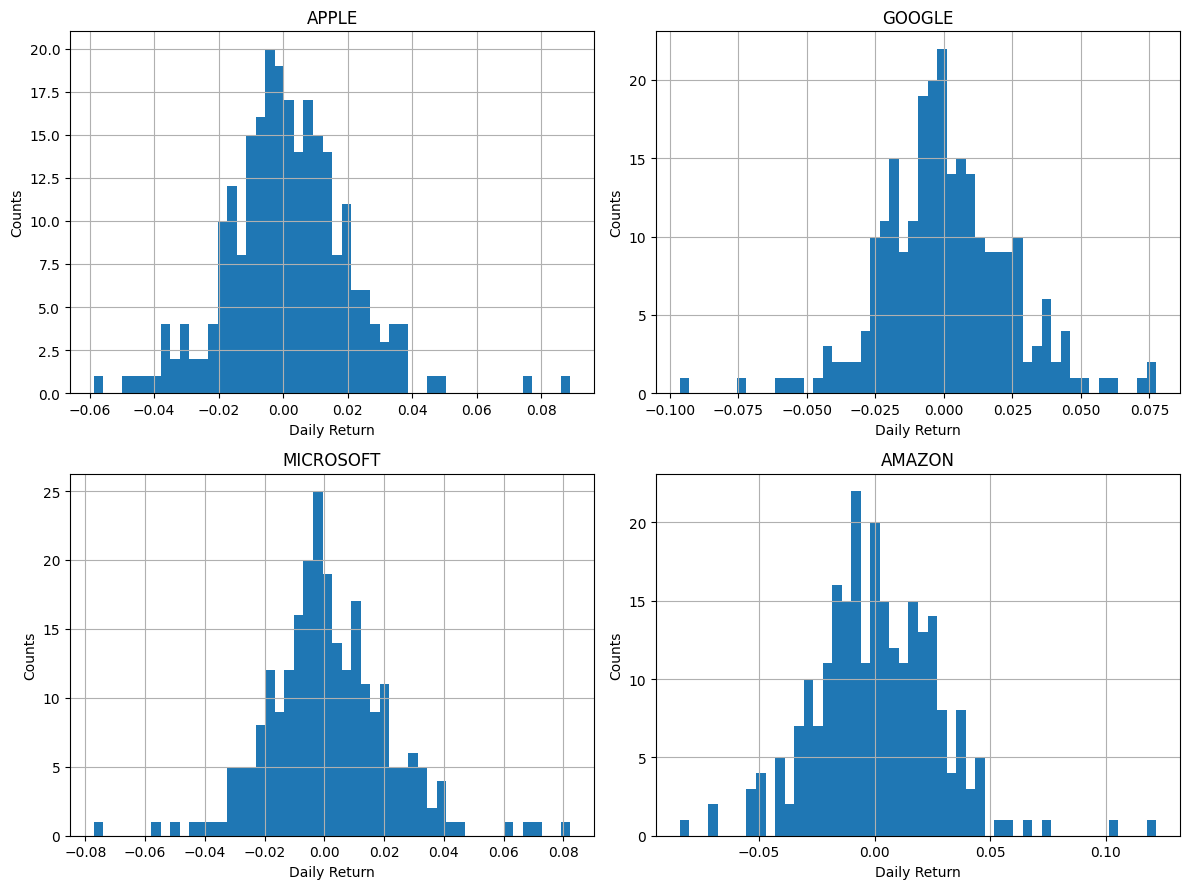

In [ ]:
plt.figure(figsize=(12, 9))

for i , company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company['Daily Return'].hist(bins=50)
  plt.xlabel('Daily Return')
  plt.ylabel('Counts')
  plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

```
What was the correlation between different stocks closing prices?
```

In [ ]:
# Creating closing price data set for correlation
closing_df = pdr.get_data_yahoo(tech_list, start=startDate, end=endDate)['Adj Close']

tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-06-15,NaN,NaN,NaN,NaN
2022-06-16,-0.039651,-0.037243,-0.034011,-0.026970
2022-06-17,0.011533,0.024696,0.011530,0.010940
2022-06-21,0.032761,0.023159,0.038469,0.024591
2022-06-22,-0.003827,0.002484,0.000170,-0.002404


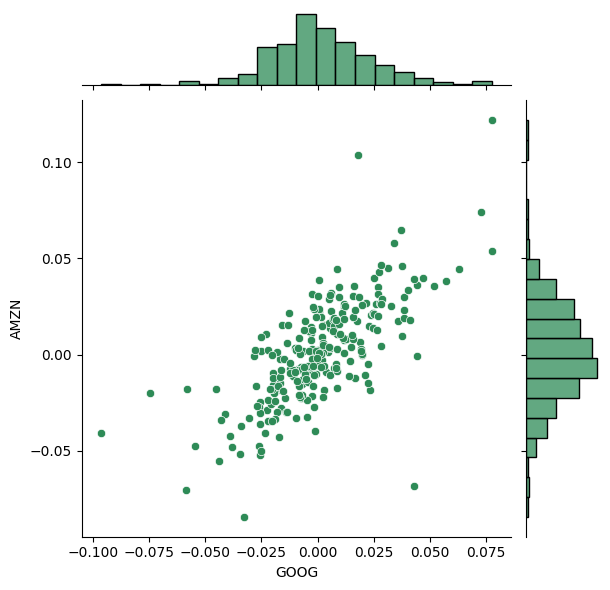

In [ ]:
sns.jointplot(x='GOOG', y='AMZN', data=tech_rets, kind='scatter', color='seagreen')

Calling pairplot on our DataFrame for an automatic visual analysis

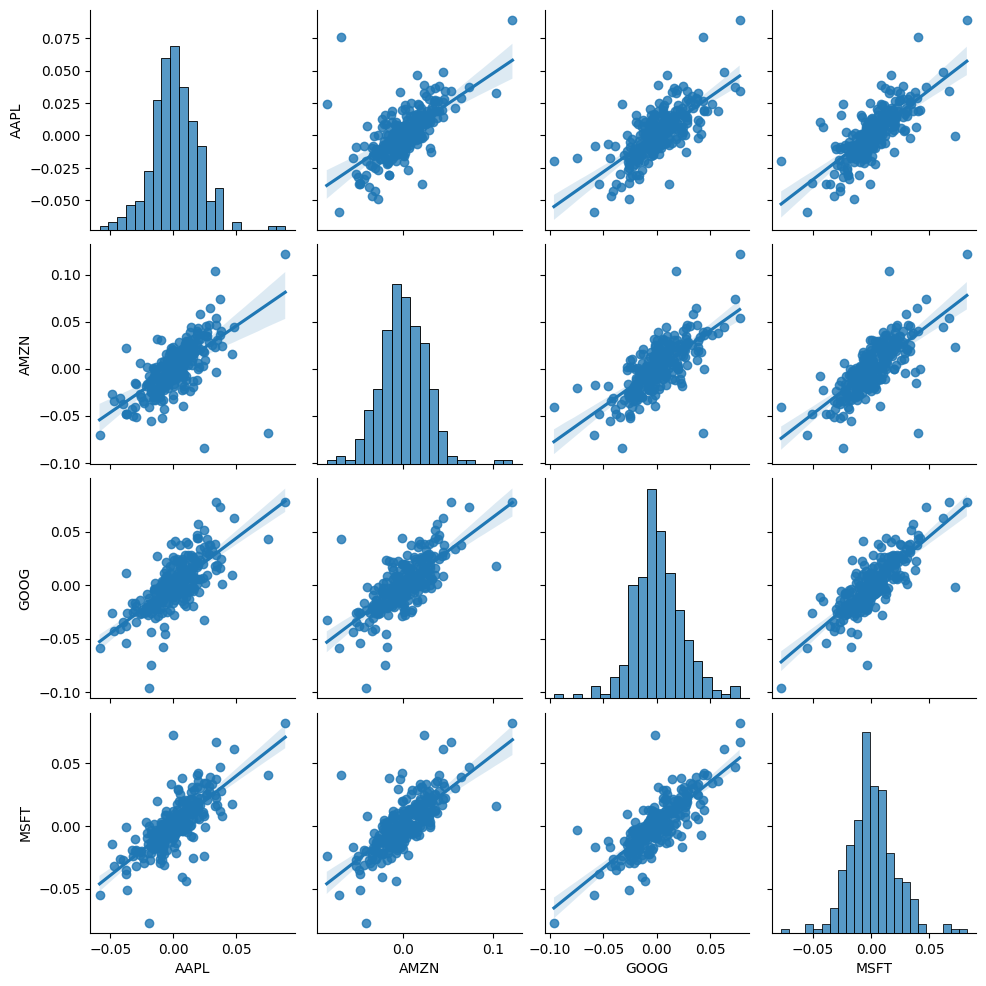

In [ ]:
sns.pairplot(tech_rets, kind='reg')

Using Seaborn for further analysis using ParGrid()

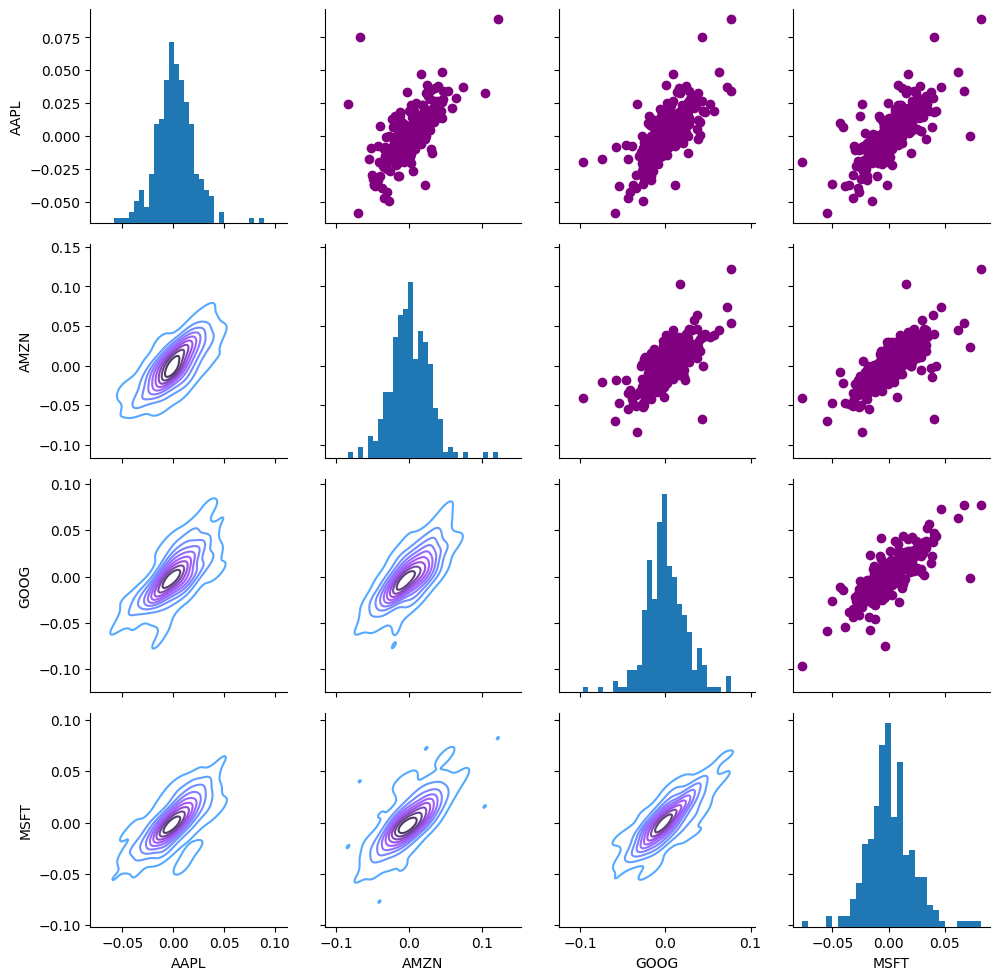

In [ ]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

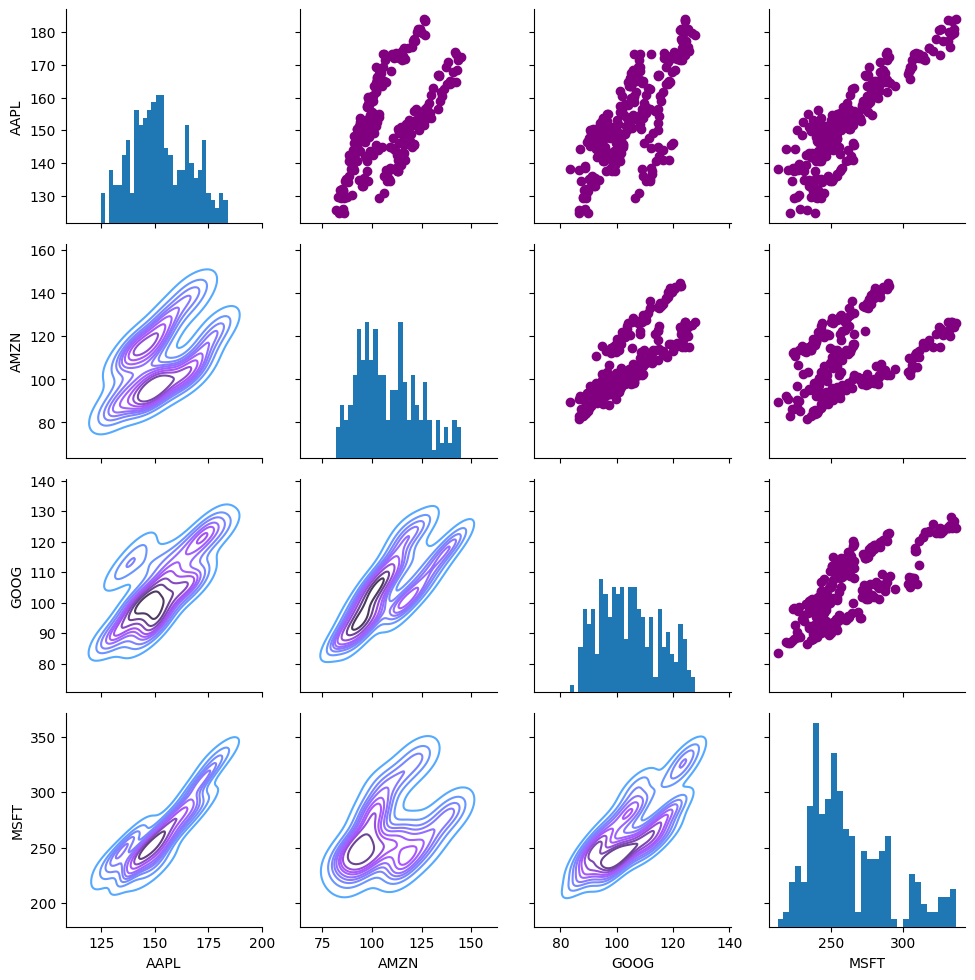

In [ ]:
return_fig = sns.PairGrid(closing_df)
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

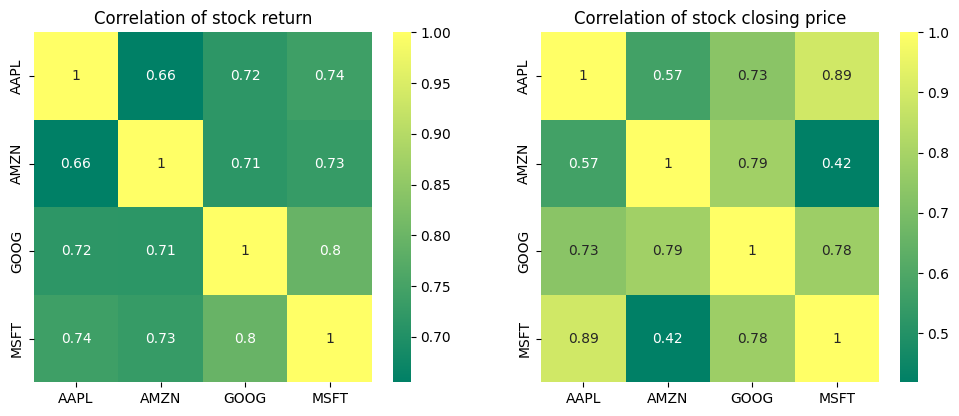

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Using daily percentage risk to value risk in investing in particular stock

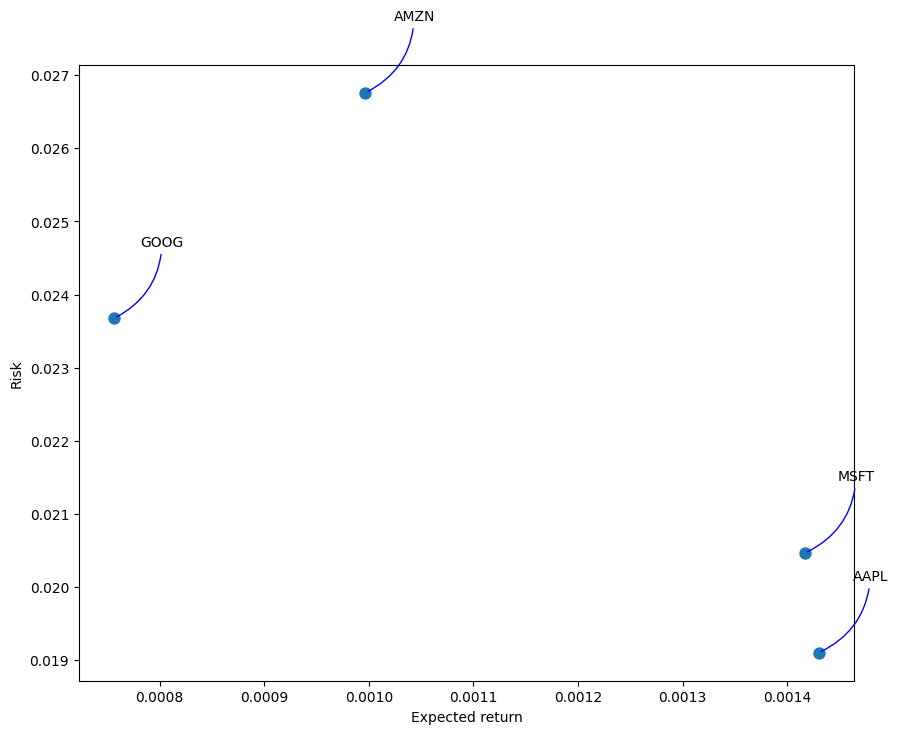

In [ ]:
rets = tech_rets.dropna()
area = np.pi * 20

plt.figure(figsize = (10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected return")
plt.ylabel("Risk")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
  plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3, rad=-0.3'))


Predicting the closing price of apple's stock

In [ ]:
df = pdr.get_data_yahoo('AMZN', start='2012-01-01', end=datetime.now())
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.794500,8.974000,8.777500,8.951500,8.951500,102216000
2012-01-04,8.960500,9.025000,8.803500,8.875500,8.875500,84104000
2012-01-05,8.797000,8.912500,8.702500,8.880500,8.880500,76182000
2012-01-06,8.903500,9.232500,8.875000,9.130500,9.130500,140168000
2012-01-09,9.138000,9.218500,8.850000,8.928000,8.928000,101138000
...,...,...,...,...,...,...
2023-06-08,123.010002,125.629997,122.260002,124.250000,124.250000,62159300
2023-06-09,124.080002,125.800003,123.190002,123.430000,123.430000,51330000
2023-06-12,124.019997,126.779999,123.529999,126.570000,126.570000,51338000


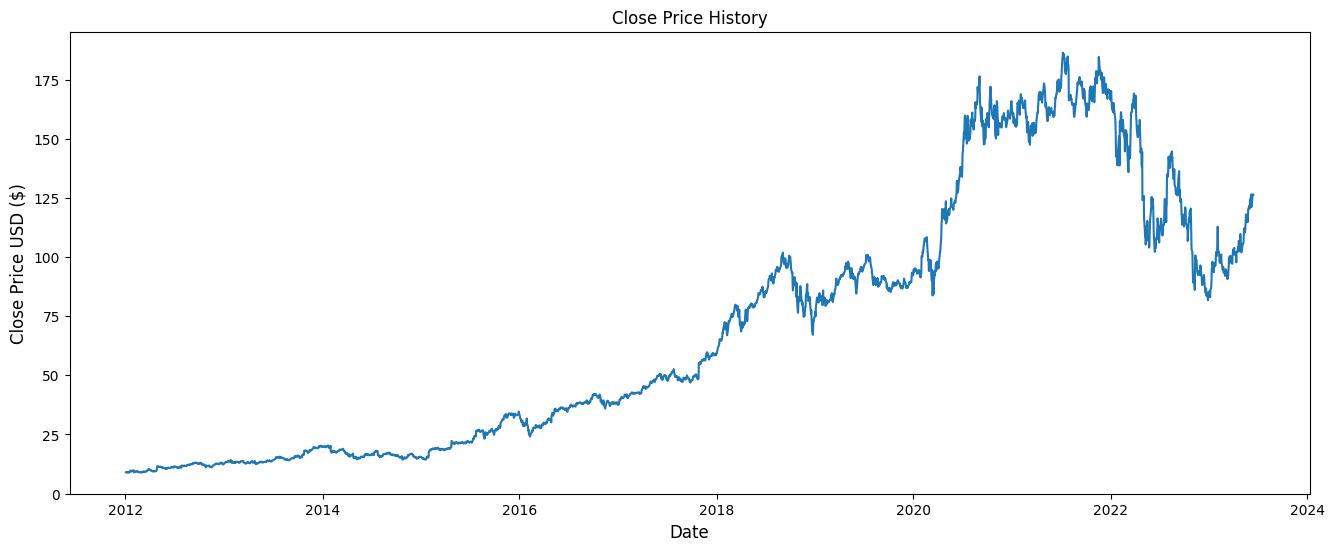

In [ ]:
plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.show()

In [ ]:
# Creating new dataframe with only close column values
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .95))
training_data_len

2737

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[8.71892048e-04],
       [4.44381751e-04],
       [4.72507993e-04],
       ...,
       [6.62490030e-01],
       [6.62996313e-01],
       [6.61646253e-01]])

In [ ]:
#Train test split
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
      print(x_train)
      print(y_train)
      print()

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.00087189, 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070032, 0.0016116 ,
       0.00379977, 0.00520886, 0.00421884, 0.00285756, 0.0031135 ,
       0.00333851, 0.00489104, 0.00546762, 0.00456197, 0.00520605,
       0.00099283, 0.00162847, 0.00330476, 0.00202785, 0.00232318,
       0.00268599, 0.00254536, 0.00270287, 0.00440447, 0.0043229 ,
       0.00240193, 0.00112502, 0.00184785, 0.00178035, 0.00130784,
       0.00083252, 0.00090002, 0.00073127, 0.00221348, 0.00105752,
       0.00115596, 0.00094783, 0.00121783, 0.00145128, 0.00220505,
       0.00329351, 0.00235973, 0.00209817, 0.00243567, 0.00178035,
       0.00239068, 0.00256505, 0.00269724, 0.0046126 , 0.00444384,
       0.00463228, 0.0053748 , 0.00757704, 0.00829986, 0.00709609])]
[0.008066421706034416]

[array([0.00087189, 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070032, 0.0016116 ,
       0.00379977, 0.00520886, 0.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2677/2677 [==============================] - 108s 39ms/step - loss: 0.0021


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 35ms/step


5.015555451033137

<ipython-input-147-9d994c3acbcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


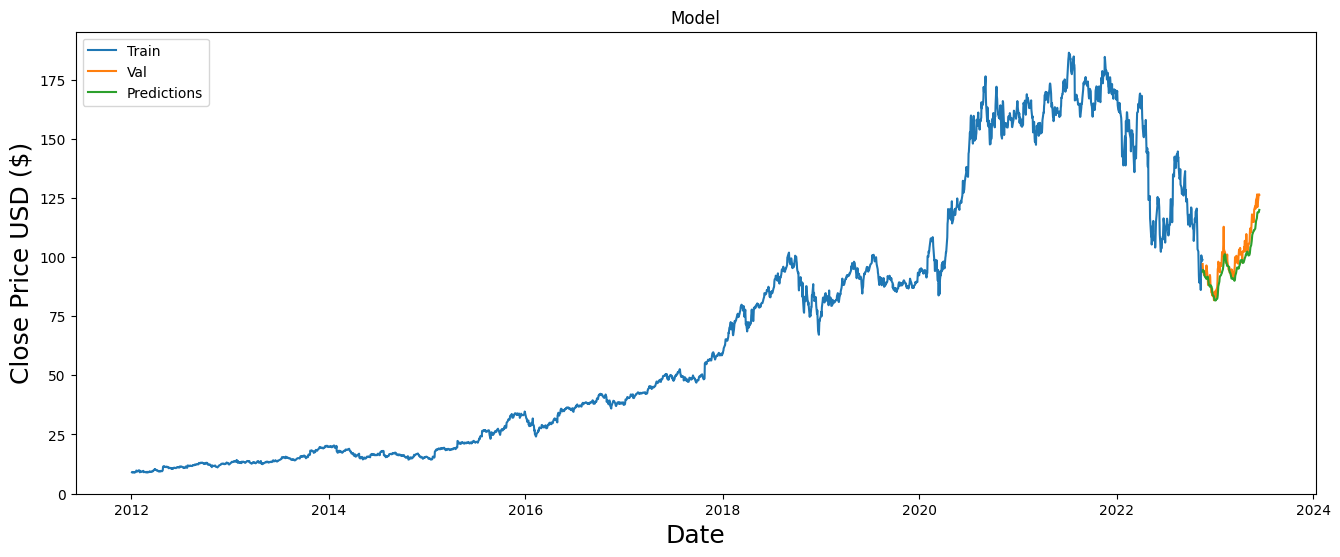

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()